In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/myanimelist-dataset/user-filtered.csv
/kaggle/input/myanimelist-dataset/users-score-2023.csv
/kaggle/input/myanimelist-dataset/anime-filtered.csv
/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv
/kaggle/input/myanimelist-dataset/final_animedataset.csv
/kaggle/input/myanimelist-dataset/users-details-2023.csv


# Anime Watch time Analysis

# Data Description

The dataset consists of three CSV files that provide valuable insights into anime content, user details, and user ratings on the platform.

### 1. **`anime-dataset-2023.csv`**

This dataset contains detailed information about various anime titles. The columns are as follows:

- **`anime_id`**: Unique ID for each anime.
- **`Name`**: The name of the anime in its original language.
- **`English name`**: The English name of the anime.
- **`Other name`**: Native name or title of the anime (can be in Japanese, Chinese, or Korean).
- **`Score`**: The score or rating given to the anime.
- **`Genres`**: The genres of the anime, separated by commas.
- **`Synopsis`**: A brief description or summary of the anime's plot.
- **`Type`**: The type of the anime (e.g., TV series, movie, OVA, etc.).
- **`Episodes`**: The number of episodes in the anime.
- **`Aired`**: The dates when the anime was aired.
- **`Premiered`**: The season and year when the anime premiered.
- **`Status`**: The status of the anime (e.g., Finished Airing, Currently Airing, etc.).
- **`Producers`**: The production companies or producers of the anime.
- **`Licensors`**: The licensors of the anime (e.g., streaming platforms).
- **`Studios`**: The animation studios that worked on the anime.
- **`Source`**: The source material of the anime (e.g., manga, light novel, original).
- **`Duration`**: The duration of each episode.
- **`Rating`**: The age rating of the anime.
- **`Rank`**: The rank of the anime based on popularity or other criteria.
- **`Popularity`**: The popularity rank of the anime.
- **`Favorites`**: The number of times the anime was marked as a favorite by users.
- **`Scored By`**: The number of users who scored the anime.
- **`Members`**: The number of members who have added the anime to their list on the platform.
- **`Image URL`**: The URL of the anime's image or poster.

This dataset provides insights into the characteristics, ratings, popularity, and viewership of various anime shows. It is useful for analyzing trends, discovering top-rated anime, and building recommendation systems.

---

### 2. **`users-details-2023.csv`**

This dataset contains user-specific information and helps analyze user behavior on the platform. The columns include:

- **`Mal ID`**: Unique ID for each user.
- **`Username`**: The username of the user.
- **`Gender`**: The gender of the user.
- **`Birthday`**: The birthday of the user (in ISO format).
- **`Location`**: The location or country of the user.
- **`Joined`**: The date when the user joined the platform (in ISO format).
- **`Days Watched`**: The total number of days the user has spent watching anime.
- **`Mean Score`**: The average score given by the user to the anime they have watched.
- **`Watching`**: The number of anime currently being watched by the user.
- **`Completed`**: The number of anime completed by the user.
- **`On Hold`**: The number of anime on hold by the user.
- **`Dropped`**: The number of anime dropped by the user.
- **`Plan to Watch`**: The number of anime the user plans to watch in the future.
- **`Total Entries`**: The total number of anime entries in the user's list.
- **`Rewatched`**: The number of anime rewatched by the user.
- **`Episodes Watched`**: The total number of episodes watched by the user.

This dataset is useful for understanding user preferences, engagement, and watching habits. You can segment users based on activity levels, analyze their demographic patterns, and explore trends in user retention, rewatching habits, and location-based preferences.

---

### 3. **`users-score-2023.csv`**

This dataset contains user ratings for individual anime titles. The columns are:

- **`user_id`**: Unique ID for each user.
- **`Username`**: The username of the user.
- **`anime_id`**: Unique ID for each anime.
- **`Anime Title`**: The title of the anime.
- **`rating`**: The rating given by the user to the anime.

This dataset allows for detailed analysis of user interactions with specific anime, including identifying highly-rated anime and understanding user preferences. It is particularly useful for building recommendation systems, performing collaborative filtering, and analyzing trends in user ratings.

---

### Summary

By combining these three datasets, you can perform a variety of analyses to understand the anime ecosystem and user preferences. Potential analyses include:

- **Identifying top-rated and most popular anime**.
- **Genre-based analyses** to discover which genres are most highly rated.
- **User segmentation** based on engagement metrics (e.g., active users vs casual viewers).
- **Building a recommendation system** to suggest anime based on user ratings and preferences.
- **Trend analysis** based on user demographics, location, and time-based metrics.

This dataset is a rich resource for anyone looking to explore anime preferences, behavior patterns, and user engagement on anime platforms.


In [7]:
# importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [8]:
anime_data=pd.read_csv('/kaggle/input/myanimelist-dataset/anime-dataset-2023.csv')

In [9]:
user_data=pd.read_csv('/kaggle/input/myanimelist-dataset/users-details-2023.csv')

In [10]:
rating_data=pd.read_csv('/kaggle/input/myanimelist-dataset/users-score-2023.csv')

In [11]:
anime_data.columns

Index(['anime_id', 'Name', 'English name', 'Other name', 'Score', 'Genres',
       'Synopsis', 'Type', 'Episodes', 'Aired', 'Premiered', 'Status',
       'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating',
       'Rank', 'Popularity', 'Favorites', 'Scored By', 'Members', 'Image URL'],
      dtype='object')

In [12]:
user_data.columns

Index(['Mal ID', 'Username', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched'],
      dtype='object')

In [13]:
rating_data.columns

Index(['user_id', 'Username', 'anime_id', 'Anime Title', 'rating'], dtype='object')

**Points to remember :-**
1. 'Mal ID' and 'user_id' are same columns in all three datasets, so change the name of 'Mal ID' to 'user_id' to avoid confusion and to merge the data.
2. After merging the data remove the unnecessary columns.

In [14]:
user_data['user_id']=user_data['Mal ID']

In [15]:
user_data.drop(columns=['Mal ID'], inplace=True)

In [16]:
user_data.columns

Index(['Username', 'Gender', 'Birthday', 'Location', 'Joined', 'Days Watched',
       'Mean Score', 'Watching', 'Completed', 'On Hold', 'Dropped',
       'Plan to Watch', 'Total Entries', 'Rewatched', 'Episodes Watched',
       'user_id'],
      dtype='object')

In [19]:
user_merged.shape

(24792412, 20)

In [25]:
user_merged.head(2)

,Username_x,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched,user_id,Username_y,anime_id,Anime Title,rating
0,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0,1,Xinil,21.0,One Piece,9.0
1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.3,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0,1,Xinil,48.0,.hack//Sign,7.0


In [17]:
user_merged=pd.merge(user_data, rating_data, on='user_id', how='outer')
user_merged.columns

Index(['Username_x', 'Gender', 'Birthday', 'Location', 'Joined',
       'Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched', 'user_id', 'Username_y', 'anime_id', 'Anime Title',
       'rating'],
      dtype='object')

In [26]:
user_merged.drop(columns=['Username_x'],inplace=True)

# EDA on the User Data *(user_merged)*

In [35]:
user_merged.shape

(24792412, 19)

## Descriptive Analysis

#### Numerical columns

In [28]:
user_merged.select_dtypes(np.number).columns

Index(['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched', 'user_id', 'anime_id', 'rating'],
      dtype='object')

In [34]:
num_cols=['Days Watched', 'Mean Score', 'Watching', 'Completed', 'On Hold',
       'Dropped', 'Plan to Watch', 'Total Entries', 'Rewatched',
       'Episodes Watched', 'rating']
user_merged[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Days Watched,24270664.0,114.935416,384.801272,0.0,45.60,86.60,150.20,105338.6
Mean Score,24270664.0,7.487544,1.260542,0.0,7.07,7.61,8.12,255.0
Watching,24270664.0,16.912386,34.106350,0.0,3.00,8.00,18.00,4358.0
Completed,24270664.0,373.397714,416.643152,0.0,112.00,243.00,476.00,13226.0
On Hold,24270664.0,15.594434,38.371124,0.0,1.00,5.00,17.00,5167.0
Dropped,24270664.0,25.864445,70.227895,0.0,1.00,7.00,25.00,14341.0
Plan to Watch,24270664.0,77.785690,176.533672,0.0,6.00,28.00,84.00,21804.0
Total Entries,24270664.0,509.556875,530.883152,0.0,166.00,350.00,667.00,24817.0
Rewatched,24270664.0,20.236539,62.919656,0.0,0.00,1.00,15.00,13215.0
Episodes Watched,24270664.0,7249.233767,25997.542304,0.0,2724.00,5203.00,9095.00,33764424.0


### Inferences :
1. There are null values in the column 'rating'.
2. data in column 'Episodes Watched' is highly +vely skewed that means there are outliers present in this columns and other.
3. there are a few people that has decided to watch the anime.

KeyboardInterrupt: 

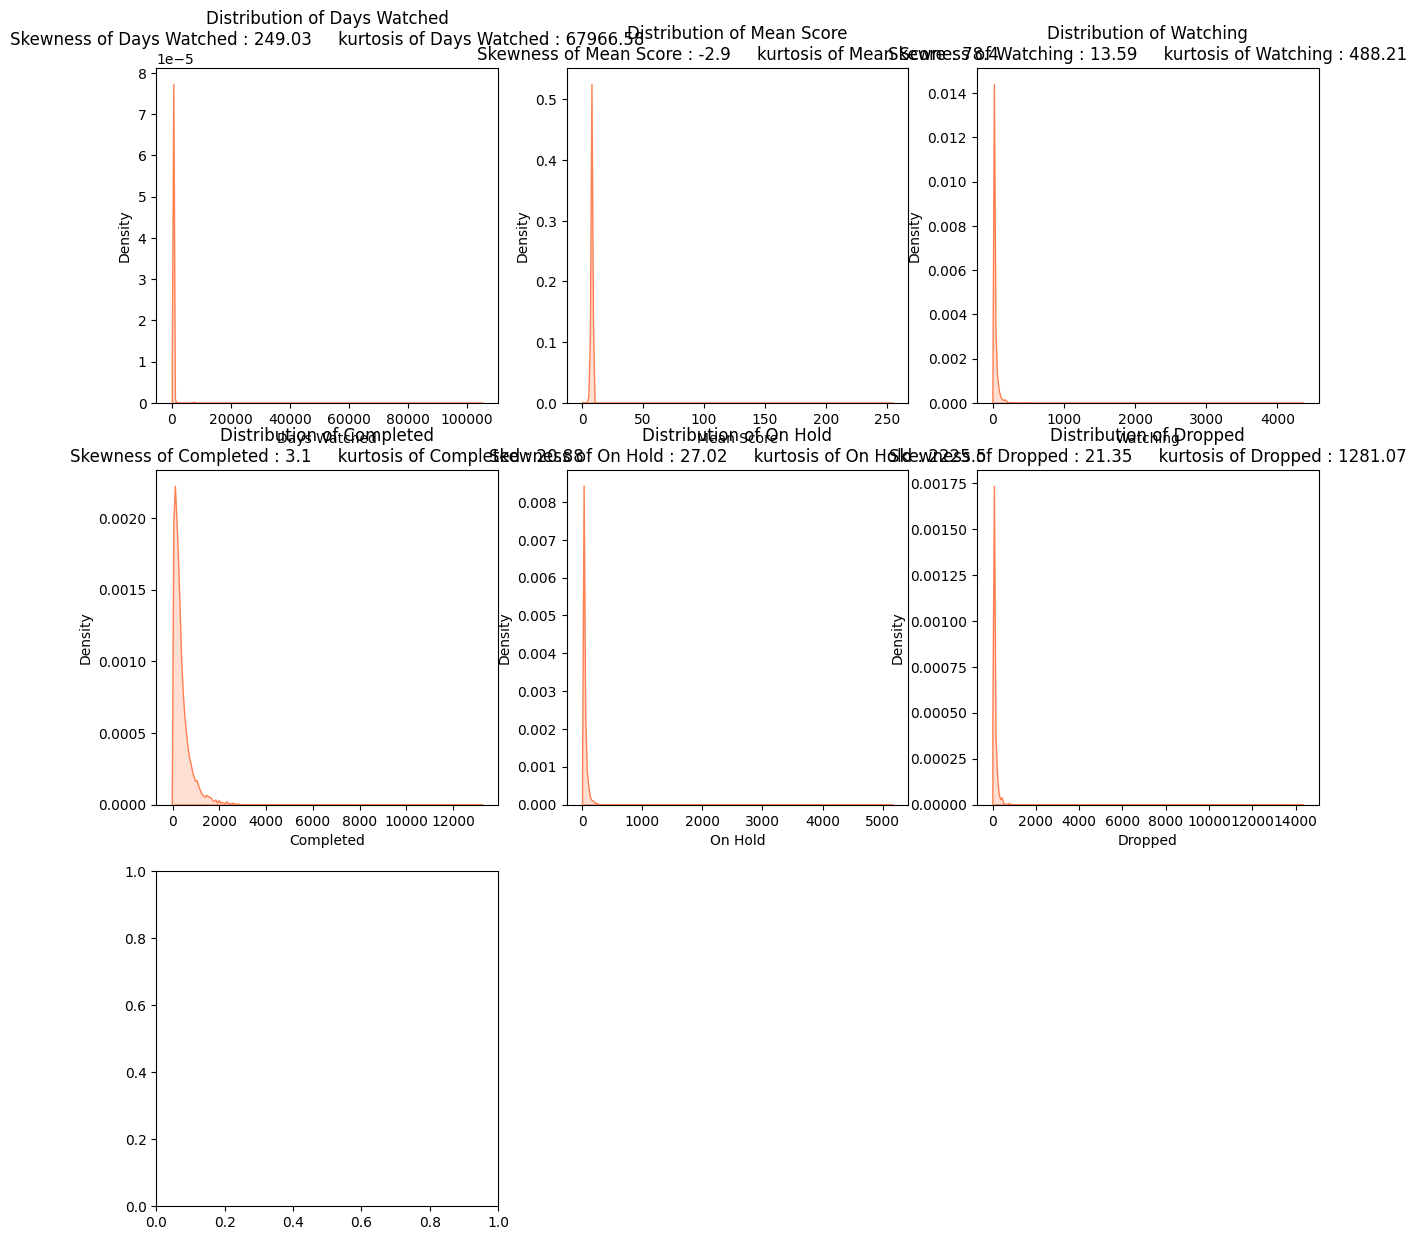

In [55]:
# Checking distribution of the data.
t=1
cols=2
rows=6
plt.figure(figsize=(15,20))
for i in num_cols:
    plt.subplot(rows,cols,t)
    sns.kdeplot(data=user_merged,x=i,fill=True,color='coral')
    plt.title(f'Distribution of {i}\nSkewness of {i} : {round(user_merged[i].skew(),2)} \
    kurtosis of {i} : {round(user_merged[i].kurt(),2)}')
    t+=1
plt.xtics(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(data=user_merged[num_cols].corr(),vmin=-1,vmax=1,\
           annot=True)
plt.show()

#### Categorical columns

In [ ]:
user_merged.select_dtypes(object).columns

In [ ]:
cat_cols=['Gender', 'Birthday', 'Location', 'Joined', 'Username_y',
       'Anime Title']
user_merged[cat_cols].describe().T

## Univariate Analysis

### Numerical columns

In [ ]:
num_cols=['Days Watched','Mean Score','Watching','Completed','On Hold','Dropped',
          'Plan to Watch','Total Entries','Rewatched','Episodes Watched']
t=1
cols=2
rows=5
plt.figure(figsize=(15,20))
for i in num_cols:
    plt.subplot(rows,cols,t)
    sns.distplot(data=user_merged,y=i,color='coral')
    t+=1
plt.xtics(rotation=45)
plt.tight_layout()
plt.show()